In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 30 14:21:55 2019
@author: Tarik, Sondra, Marceline
"""

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import os

from sqlalchemy import create_engine
import argparse
#~ import creds
import os,configparser # credentials: 
#Demander le(s) mot(s) clés & et le(s) lieu(x)
query = input("Veuillez enter le(s) mot(s) clés pour la recherche: \n").lower()
location = input("Veuillez enter le(s) lieu(x) pour la recherche: \n").upper()


#launch url
url = 'https://candidat.pole-emploi.fr/offres/recherche?lieux={}&motsCles={}&offresPartenaires=true&range=0-9&rayon=10&tri=0'.format(location,query)
base_url="https://candidat.pole-emploi.fr"

#Critères : données + centre val de loire
req = requests.get(url)
soup = BeautifulSoup(req.text, "lxml")

#Nombre d'offres
titre = soup.find('h1', class_ ='title')
nb_offres = int(titre.next_element.replace('\n', '').replace(' offres', ''))
print("il ya ",nb_offres,"Offres pour votre recherche")


if (nb_offres>150):
    nbpage= (nb_offres//150)+1
    url2=150
else:
    url2=nb_offres
    nbpage=1
url1=0

#Creation de liste
NumOffre=[]
title=[]
Publication=[]
Experiences=[]
Localisation=[]
listeallUrl=[]
Description=[]
Contrat=[]
Horaires=[]
Salaire=[]
Savoirsfaire=[]
Savoir_etre=[]
Formation=[]
Qualifications=[]
Secteur=[]
Entreprise=[]
Partenaire=[]
for i in range(nbpage):
    
    print("------------",i,"---------") 
    
    url='https://candidat.pole-emploi.fr/offres/recherche?lieux={}&motsCles={}&offresPartenaires=true&range='.format(location,query) +str(url1)+'-'+str(url2)+'&rayon=10&tri=0'
    uc=nb_offres-url2
    
    if (uc>150):
        url1+=150
        if (url1==url2):
            url1+=1
        url2+=150
    else:
        url1=url2
        url2=nb_offres
        
    req = requests.get(url)
    soup = BeautifulSoup(req.text, "lxml")
    
    for liens in soup.find_all('h2', class_ ='t4 media-heading'):
        allUrl=(liens.find('a', class_ ='btn-reset')['href'])
        listeallUrl.append(base_url+allUrl)
        offreUrl=base_url+allUrl
        print("-------------------------------------------","Nouvelle Offre","---------------------------------------------")
        print(base_url+allUrl)
        
        
            
        requete=requests.get(offreUrl)
        soup[i] = BeautifulSoup(requete.text, "lxml")
        
        #print(soup[i])
        #try:
        #Ajout des numéros des offres
        for num_offre in soup[i].find('span', {'itemprop' : 'value'}):
            Offre= num_offre
            #print(num_offre)
            NumOffre.append(num_offre) 
       
        
        #Ajout Titre des annonces
        for titre in soup[i].find_all('h1', {'itemprop' : 'title'}):
            Titre=titre.text.replace('\n', '')
            #print(Titre)
            title.append(Titre)
        

     
        for date in soup[i].find_all('span', {'itemprop' : 'datePosted'}):
            Date=date.next_element.replace('\n', '')
            #print(Date)
            Publication.append(Date)
            
        for experience in soup[i].find_all('span', {'itemprop' : 'experienceRequirements'}):
            exp=experience.next_element.replace('\n', '')
            print(exp)
            Experiences.append(exp)
        
        for city in soup[i].find('span', {'itemprop' : 'name'}):
            Ville=city
            #print(Ville)
            Localisation.append(Ville)  
   
        try:
            description=soup[i].find("div", {"itemprop": "description"}).get_text()
            #print(description)
            Description.append(description)
        except:
            print("il ya pas de description")            

        try:
            contrat=soup[i].find("dd").get_text()
            print(contrat)
            Contrat.append(contrat)
        except:
            Contrat.append("il ya pas de type de contrat renseigné")
            print("il ya pas de type de contrat renseigné")            

        try:
            contratheures=soup[i].find("dd", {"itemprop": "workHours"}).get_text()
            #print(contratheures)
            Horaires.append(contratheures)
        except:
            Horaires.append("il ya pas de type d'horraires de contrat renseigné")
            print("il ya pas de type d'horraires de contrat renseigné")

        try:
            salaire = soup[i].findAll('dd')[2].text
            s=salaire.replace('\n', '').replace('\xa0', '')
                
            #print(s)
            Salaire.append(s)
        except:
            Salaire.append("il ya pas de salaire renseigné")
            print("il ya pas de salaire renseigné")

        
        sfaire=[]
                      
        for savoirsfaire in soup[i].find_all('span', {'itemprop' : 'skills'}):
               
            sfaire.append(savoirsfaire.text)
        if not sfaire:
            print("il ya pas de savoirsfaire renseigné")
            Savoirsfaire.append("il ya pas de savoirsfaire renseigné")
        else:
            print(sfaire)
            Savoirsfaire.append(str(sfaire))
            

               
        setre=[]
        try:              
            savoir_etre = soup[i].find('h4', class_= 't6 skill-subtitle',text='Savoir-être professionnels').next_sibling
            #print(savoir_etre)
            for savoirE in savoir_etre.find_all('span', class_ ='skill-name'):
                
                setre.append(savoirE.text)
        
            Savoir_etre.append(str(setre))
        except:
            print("il ya pas de Savoir-être professionnels renseigné")
            Savoir_etre.append("il ya pas de Savoir-être professionnels renseigné")

        try:
            formation = soup[i].find('span', {'itemprop' : 'educationRequirements'}).get_text()
            Formation.append(formation)
            print(formation)
        except:
            print("il ya pas de formation renseigné")
            Formation.append("il ya pas de formation renseigné") 
        
        
        try:
            qualifications = soup[i].find('span', {'itemprop' : 'qualifications'}).get_text()
            Qualifications.append(qualifications)
            print(qualifications)
        except:
            print("il ya pas de qualifications renseigné")
            Qualifications.append("il ya pas de qualifications renseigné")


        try:
            secteuractv = soup[i].find('span', {'itemprop' : 'industry'}).get_text()
            Secteur.append(secteuractv)
            print(secteuractv)
        except:
            print("il ya pas de secteur renseigné")
            Secteur.append("il ya pas de secteur renseigné")        




        try:
            entreprise = soup[i].find('h4', {'class' : 't4 title'}).get_text()
            Entreprise.append(entreprise)
            print(entreprise)
        except:
            
            print("il ya pas d'entreprise renseigné")
            Entreprise.append("il ya pas d'entreprise renseigné")


        try:
            partenaire = soup[i].find('ul',class_='partner-list').find('a')['href'] 
            Partenaire.append(partenaire)
            print(partenaire)
        except:
            print("il ya pas de partenaire renseigné")
            Partenaire.append("il ya pas de partenaire renseigné") 




        
pd.set_option("display.colheader_justify","right")
df = pd.DataFrame({"Numéro de l'offre":NumOffre,"Titre de l'offre":title,"Localisation":Localisation,
                   "Experiences":Experiences,"Date de publication" : Publication,"Description" : Description,
                   "Contrat" : Contrat,"Horaires du Contrat" : Horaires,"Salaire" : Salaire,"Savoirsfaire" : Savoirsfaire,"Savoir-être" : Savoir_etre,
                   "Formation" : Formation,"Qualifications" : Qualifications,"Secteur" : Secteur,"Entreprise" : Entreprise,"Partenaire" : Partenaire})
df['datefirst'] = pd.to_datetime('today').strftime("%d/%m/%Y")
df['datelast'] = df['datefirst'] 
df.to_csv("pole_emploi.csv", encoding="utf-8") 
print(df)    
        


Veuillez enter le(s) mot(s) clés pour la recherche: 
sql
Veuillez enter le(s) lieu(x) pour la recherche: 
24r
il ya  67 Offres pour votre recherche
------------ 0 ---------
------------------------------------------- Nouvelle Offre ---------------------------------------------
https://candidat.pole-emploi.fr/offres/recherche/detail/1125749
Expérience exigée

Contrat à durée indéterminée

Contrat travail

il ya pas de type d'horraires de contrat renseigné
il ya pas de salaire renseigné
il ya pas de savoirsfaire renseigné
il ya pas de Savoir-être professionnels renseigné
il ya pas de formation renseigné
il ya pas de qualifications renseigné
il ya pas de secteur renseigné
il ya pas d'entreprise renseigné
http://joboolo.com/emploi-dba-sql-server-loye-sur-arnon/3/47616712?&utm_source=poleemploi&utm_medium=classic&utm_campaign=pe
------------------------------------------- Nouvelle Offre ---------------------------------------------
https://candidat.pole-emploi.fr/offres/recherche/detail/047

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
group_by_Localisation = df.groupby(by=['Localisation'])
Localisation_count = group_by_Localisation.count()
print(Localisation_count)

                              Numéro de l'offre  Titre de l'offre  \
Localisation                                                        
18 - Cher                                     4                 4   
18 - LOYE SUR ARNON                           1                 1   
18 - NANCAY                                   1                 1   
18 - ST DOULCHARD                             2                 2   
28 - ALLONNES                                 1                 1   
28 - CHARTRES                                 4                 4   
36 - BUZANCAIS                                1                 1   
36 - FONTENAY                                 1                 1   
36 - ISSOUDUN                                 1                 1   
36 - Indre                                    1                 1   
37 - CHAMBRAY LES TOURS                       2                 2   
37 - Indre et Loire                           4                 4   
37 - LOCHES                       

In [10]:
group_by_Experiences = df.groupby(by=['Experiences'])
Experiences_count = group_by_Experiences.count()
print(Experiences_count)

                                         Numéro de l'offre  Titre de l'offre  \
Experiences                                                                    
1 an                                                     2                 2   
1 an - QA Engineer                                       1                 1   
2 ans                                                    4                 4   
2 mois                                                   1                 1   
3 ans                                                    3                 3   
8 ans                                                    1                 1   
Débutant accepté                                        30                30   
Débutant accepté - Experience appréciée                  1                 1   
Expérience exigée                                        7                 7   
Expérience exigée de 1 à 2 An(s)                         3                 3   
Expérience exigée de 2 An(s)            

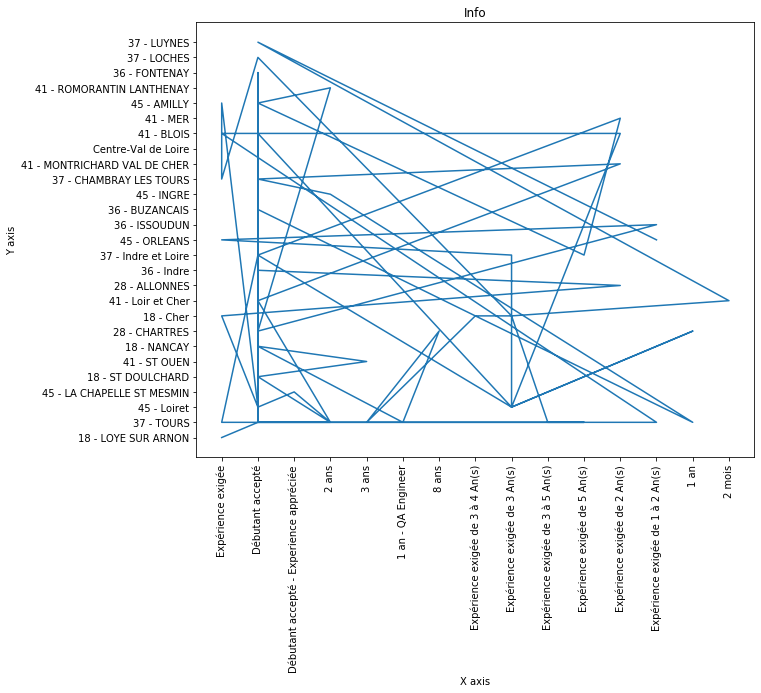

In [11]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
x = df['Experiences']
y = df['Localisation']
plt.plot(x,y)
plt.title('Info')
plt.ylabel('Y axis')
plt.xlabel('X axis')
plt.xticks(rotation=90)
plt.show()

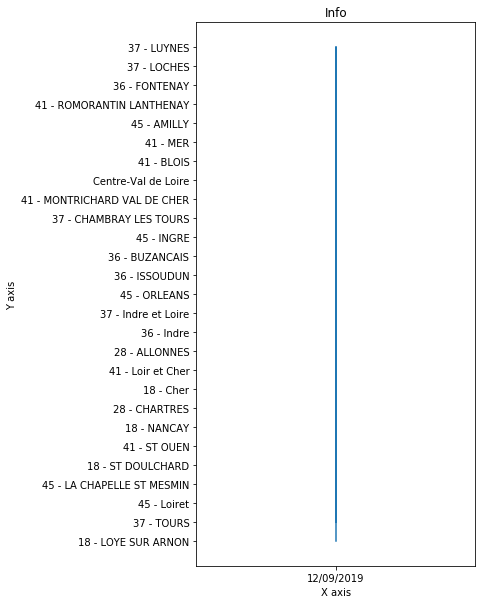

In [14]:
x = df['datefirst']
y = df['Localisation']
plt.figure(figsize=(5,10))
plt.plot(x,y)
plt.title('Info')
plt.ylabel('Y axis')
plt.xlabel('X axis')
plt.show()

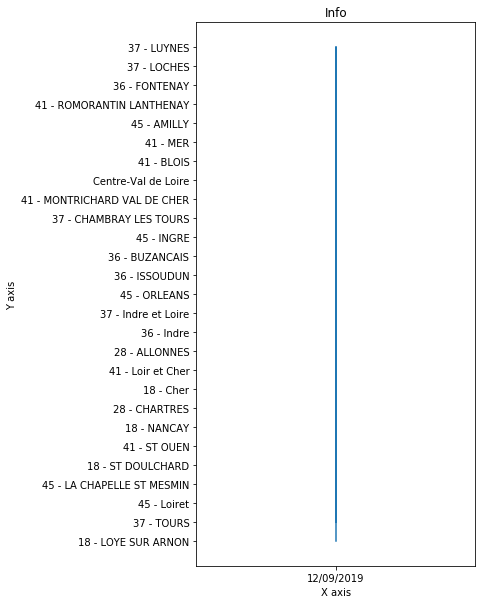

In [15]:
x = df['datelast']
y = df['Localisation']
plt.figure(figsize=(5,10))
plt.plot(x,y)
plt.title('Info')
plt.ylabel('Y axis')
plt.xlabel('X axis')
plt.show()

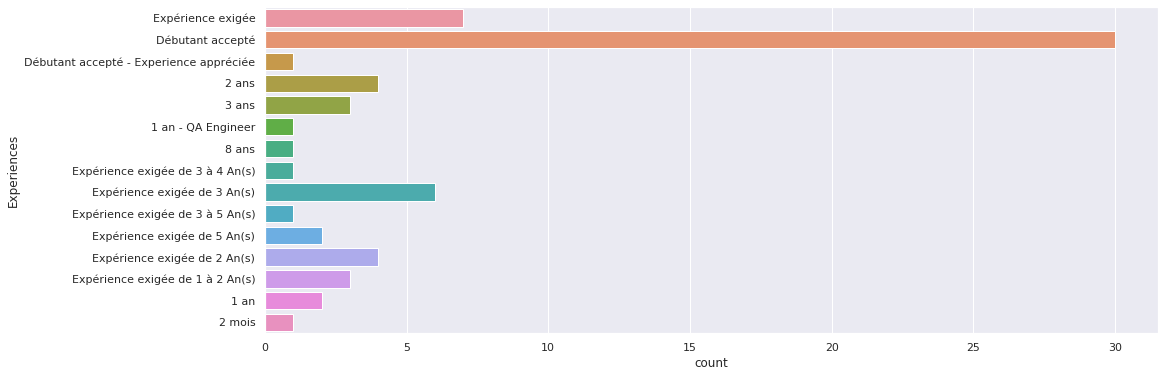

In [20]:
import seaborn as sns
plt.figure(figsize=(16, 6))
sns.set(style="darkgrid")
ax = sns.countplot(y="Experiences", data=df)

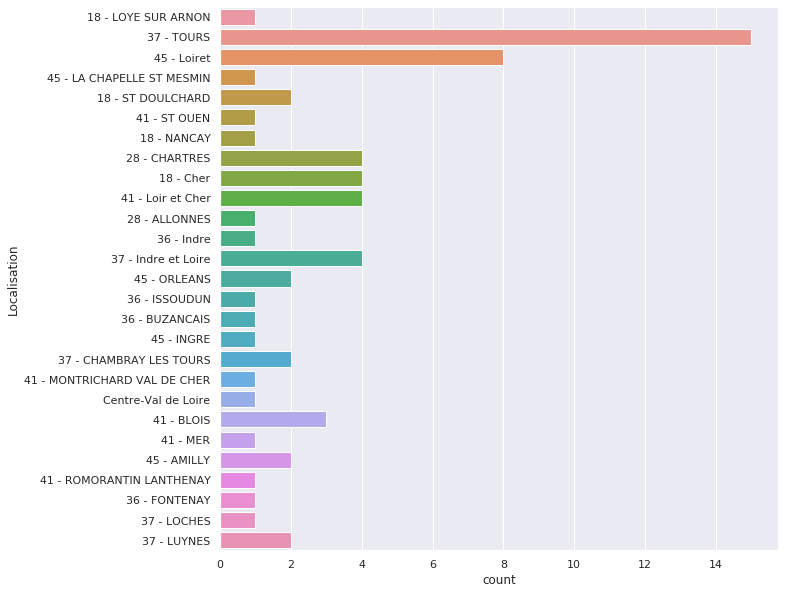

In [21]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.set(style="darkgrid")
ax = sns.countplot(y="Localisation", data=df)